In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

In [3]:
df=pd.read_csv(r'C:\Users\Vignesh\Desktop\PYTHON FILE\new project\rbi\USDINR.csv')

# DATA CLEANING

In [4]:
df.head()

,Date,USD
0,11/07/2025,85.8536
1,10/07/2025,85.5780
2,09/07/2025,85.7979
3,08/07/2025,85.7188
4,07/07/2025,85.8150


In [5]:
df.tail()

,Date,USD
3078,07/01/2009,48.61
3079,06/01/2009,48.68
3080,05/01/2009,48.37
3081,02/01/2009,48.89
3082,01/01/2009,48.73


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3083 non-null   object 
 1   USD     3083 non-null   float64
dtypes: float64(1), object(1)
memory usage: 48.3+ KB


In [7]:
print("Total missing values:\n",df.isnull().sum())

Total missing values:
 Date    0
USD     0
dtype: int64


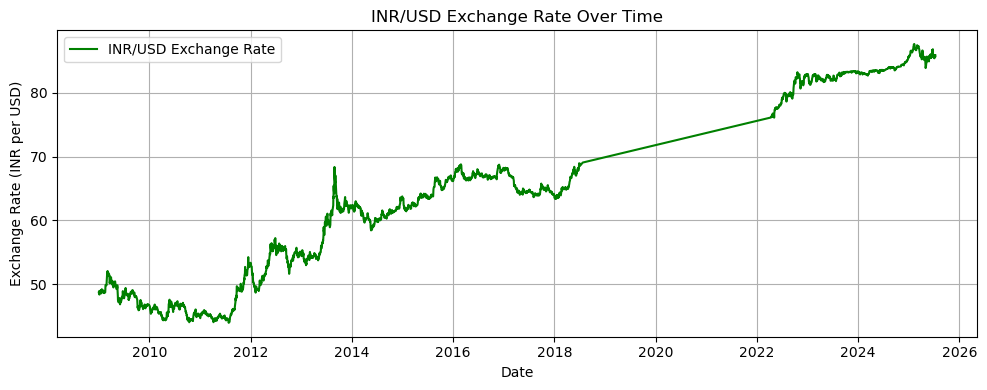

In [11]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)


plt.figure(figsize=(10,4))
plt.plot(df['Date'],df['USD'],label='INR/USD Exchange Rate',color='green')
plt.title("INR/USD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate (INR per USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Augmented Dickey-Fuller (ADF) Test

####To determine if a time series is Stationary or not

In [12]:
result=adfuller(df['USD'])

In [13]:
print("ADF Statistic:",result[0])
print("p-value:",result[1])
for key,value in result[4].items():
    print(f"Critical Value {key}:{value}")
if result[1]<0.05:
    print("Series is stationary (p < 0.05)")
else:
    print("Series is NOT stationary(p >=0.05)-differencing needed")

ADF Statistic: -1.1933872755536297
p-value: 0.6764338504230174
Critical Value 1%:-3.432477687087865
Critical Value 5%:-2.8624800782492534
Critical Value 10%:-2.5672704269177373
Series is NOT stationary(p >=0.05)-differencing needed


In [14]:
df_diff=df.diff().dropna()

In [15]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df_diff=df.diff().dropna()

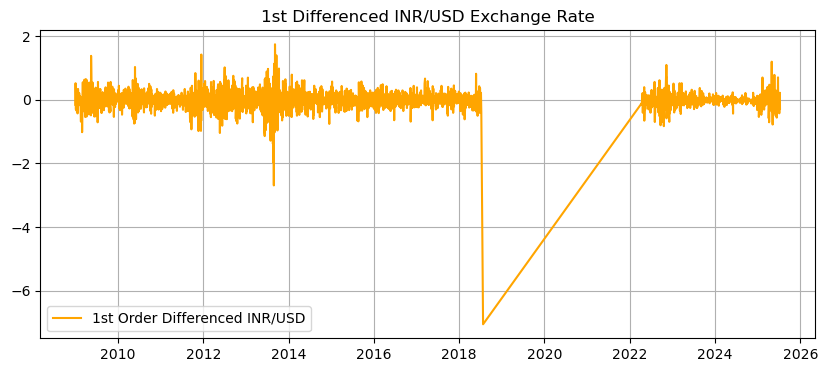

In [18]:
plt.figure(figsize=(10,4))
plt.plot(df_diff['USD'],color='orange',label='1st Order Differenced INR/USD')
plt.title("1st Differenced INR/USD Exchange Rate")
plt.grid(True)
plt.legend()
plt.show()

In [20]:
result_diff=adfuller(df_diff['USD'])

print("ADF Statistic (Differenced):",result_diff[0])
print("p-value:",result_diff[1])
for key, value in result_diff[4].items():
    print(f"Critical Value {key}:{value}")
    
if result_diff[1]<0.05:
    print("Differenced series is now stationary (p < 0.05)")
else:
    print("Still not stationary")

ADF Statistic (Differenced): -21.18966271958962
p-value: 0.0
Critical Value 1%:-3.432477687087865
Critical Value 5%:-2.8624800782492534
Critical Value 10%:-2.5672704269177373
Differenced series is now stationary (p < 0.05)


# ARIMA MODEL

# 

In [21]:
df=df.asfreq('B')
df=df.ffill()

In [23]:
model=ARIMA(df['USD'],order=(1,1,1))
model_fit= model.fit()

In [24]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    USD   No. Observations:                 4312
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -37.257
Date:                Sun, 13 Jul 2025   AIC                             80.515
Time:                        12:42:35   BIC                             99.622
Sample:                    01-01-2009   HQIC                            87.262
                         - 07-11-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4042      0.511      0.791      0.429      -0.598       1.406
ma.L1         -0.4176      0.508     -0.823      0.411      -1.413       0.577
sigma2         0.0596      0.000    428.917      0.0

# FORECASTING

# 

In [26]:
forecast_steps=30
forecast=model_fit.forecast(steps=forecast_steps)

In [27]:
last_date=df.index[-1]
last_value=df['USD'].iloc[-1]

In [28]:
forecast_index=pd.date_range(start=last_date + timedelta(days=1),periods=forecast_steps,freq='B')

In [29]:
forecast_index=pd.concat([pd.Series([last_date]),pd.Series(forecast_index)])
forecast_values=[last_value]+list(forecast)

In [30]:
forecast_series=pd.Series(forecast_values,index=forecast_index)
print(forecast_series)

2025-07-11    85.853600
2025-07-14    85.850892
2025-07-15    85.849797
2025-07-16    85.849355
2025-07-17    85.849176
2025-07-18    85.849104
2025-07-21    85.849074
2025-07-22    85.849063
2025-07-23    85.849058
2025-07-24    85.849056
2025-07-25    85.849055
2025-07-28    85.849055
2025-07-29    85.849055
2025-07-30    85.849055
2025-07-31    85.849055
2025-08-01    85.849055
2025-08-04    85.849055
2025-08-05    85.849055
2025-08-06    85.849055
2025-08-07    85.849055
2025-08-08    85.849055
2025-08-11    85.849055
2025-08-12    85.849055
2025-08-13    85.849055
2025-08-14    85.849055
2025-08-15    85.849055
2025-08-18    85.849055
2025-08-19    85.849055
2025-08-20    85.849055
2025-08-21    85.849055
2025-08-22    85.849055
dtype: float64


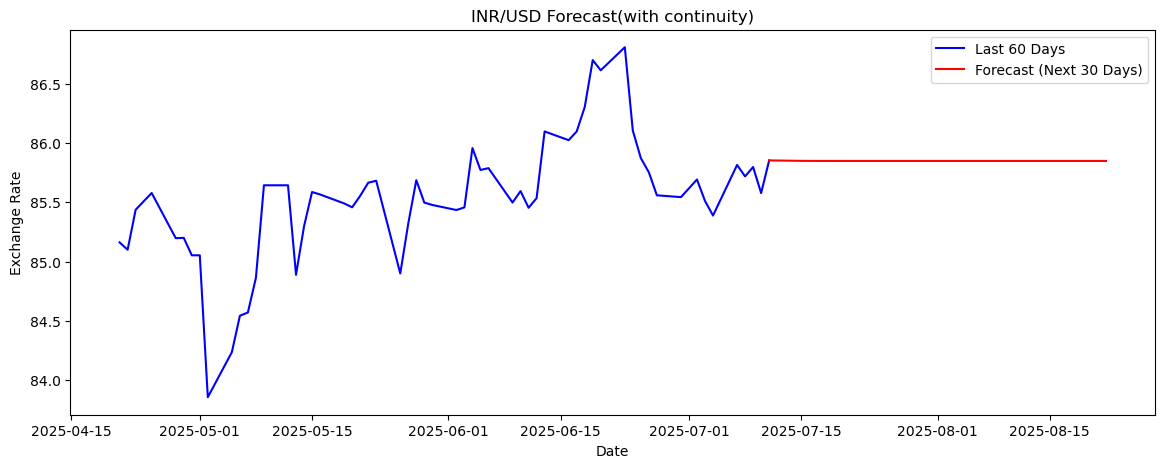

In [34]:
plt.figure(figsize=(14,5))
plt.plot(df.index[-60:],df['USD'].tail(60),label='Last 60 Days',color='blue')
plt.plot(forecast_index,forecast_values,label='Forecast (Next 30 Days)',color='red')
plt.title("INR/USD Forecast(with continuity)")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()